In [44]:
import sys

sys.path.append('C:\\Users\\alicj\\Documents\\GitHub\\RGCPD')

from clustering import clustering_temporal as ct
from sklearn.metrics import davies_bouldin_score
import numpy as np
from RGCPD import core_pp

In [3]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,7)

In [54]:
var_filename = 'C:\\Users\\alicj\\Desktop\\WORK\\data\\sst_1950-2020_1_12_monthly_1.0deg.nc'

In [52]:
core_pp.import_ds_lazy(var_filename)

sorting longitude


<xarray.DataArray 'sst' (time: 852, latitude: 180, longitude: 360)>
[55209600 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2020-12-01
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Attributes:
    long_name:  Sea surface temperature
    units:      K

In [53]:
var_filename = 'C:\\Users\\alicj\\Desktop\\WORK\\data\\data_medium.nc'

In [83]:
mask = None
dimension = 'temporal'
kwrgs_load = {}
kwrgs_load={'selbox':[130, 160, 30, 60], 'tfreq':[2]}
kwrgs_clust={'n_clusters':[2]}
clustermethodkey = 'KMeans'

xrclustered_temp, results_temp = ct.sklearn_clustering(var_filename, mask, dimension, kwrgs_load, clustermethodkey, kwrgs_clust)

sorting longitude
sorting longitude
no mask given, entire array of box [130.5, 159.5, 30.5, 59.5] will be clustered
sorting longitude
sorting longitude
clustering tfreq: 2, n_clusters: 2 sorting longitude


In [84]:
levels = np.linspace(265, 310, 91)
levels

array([265. , 265.5, 266. , 266.5, 267. , 267.5, 268. , 268.5, 269. ,
       269.5, 270. , 270.5, 271. , 271.5, 272. , 272.5, 273. , 273.5,
       274. , 274.5, 275. , 275.5, 276. , 276.5, 277. , 277.5, 278. ,
       278.5, 279. , 279.5, 280. , 280.5, 281. , 281.5, 282. , 282.5,
       283. , 283.5, 284. , 284.5, 285. , 285.5, 286. , 286.5, 287. ,
       287.5, 288. , 288.5, 289. , 289.5, 290. , 290.5, 291. , 291.5,
       292. , 292.5, 293. , 293.5, 294. , 294.5, 295. , 295.5, 296. ,
       296.5, 297. , 297.5, 298. , 298.5, 299. , 299.5, 300. , 300.5,
       301. , 301.5, 302. , 302.5, 303. , 303.5, 304. , 304.5, 305. ,
       305.5, 306. , 306.5, 307. , 307.5, 308. , 308.5, 309. , 309.5,
       310. ])

In [75]:
x = xrclustered_temp[0][0].values
x = x[~np.isnan(x)]

In [76]:
x.max()

304.42487

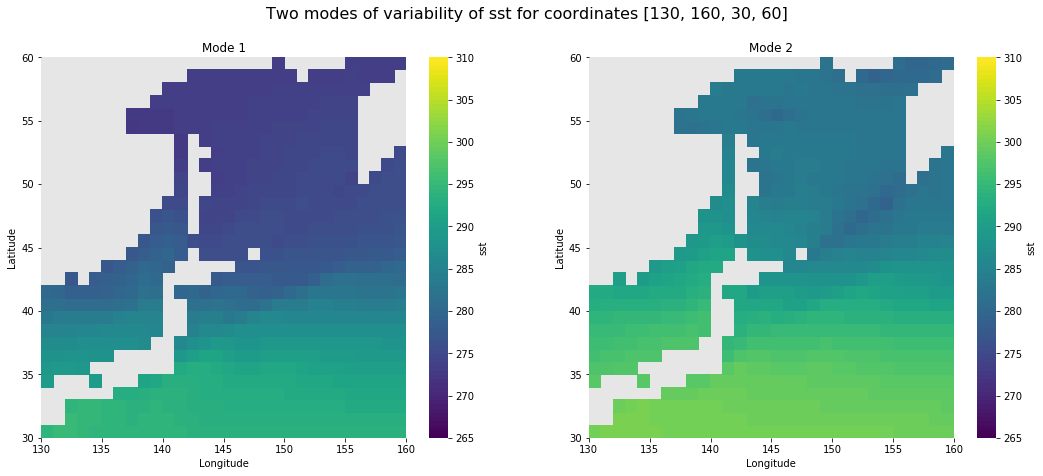

In [104]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize = (18, 7))
xrclustered_temp[0][0][np.where(xrclustered_temp[0][0]['time']['cluster'] == 1)].mean('time').plot(levels = levels, ax =ax1)
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title('Mode 1', size = 12)

xrclustered_temp[0][0][np.where(xrclustered_temp[0][0]['time']['cluster'] == 2)].mean('time').plot(levels = levels, ax = ax2)
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_title('Mode 2', size = 12)
fig.suptitle('Two modes of variability of sst for coordinates [130, 160, 30, 60]', size = 16)
#fig.savefig('Modes of temporal variability of sst', dpi = 300)

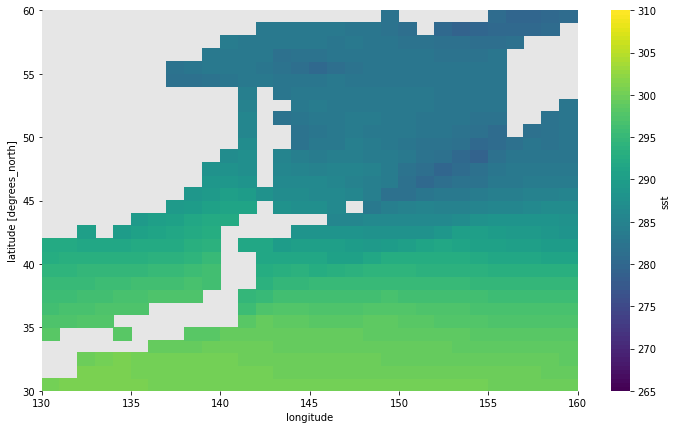

In [87]:
xrclustered_temp[0][0][np.where(xrclustered_temp[0][0]['time']['cluster'] == 2)].mean('time').plot(levels = levels)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Mode of temporal variability of sst in Pacific Ocean', size = 16)

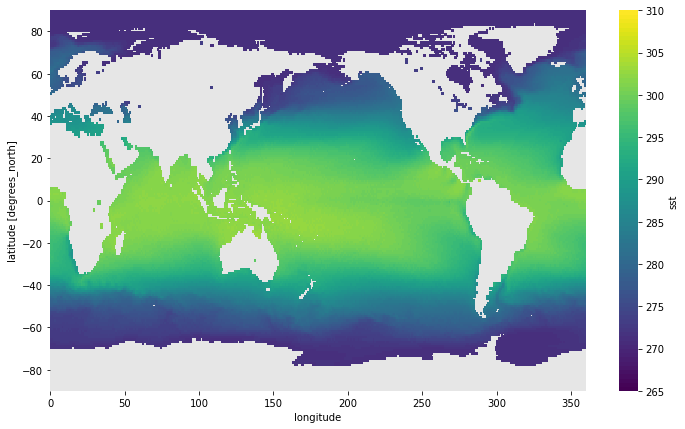

In [24]:
xrclustered_temp[0][0][np.where(xrclustered_temp[0][0]['time']['cluster'] == 3)].mean('time').plot(levels = levels)

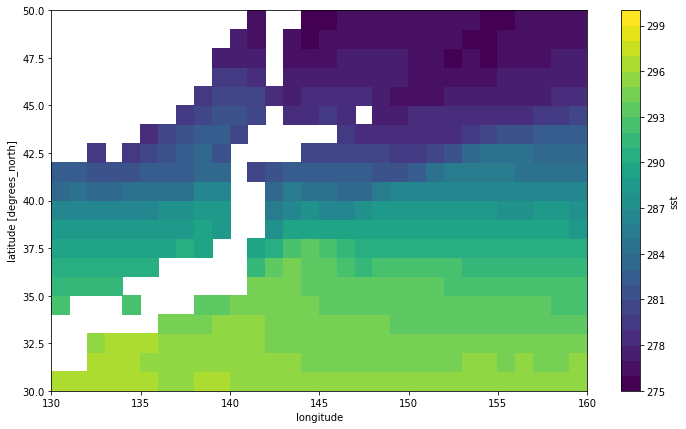

In [9]:
xrclustered_temp[1][0][np.where(xrclustered_temp[1][0]['time']['cluster'] == 1)].mean('time').plot(levels = levels)

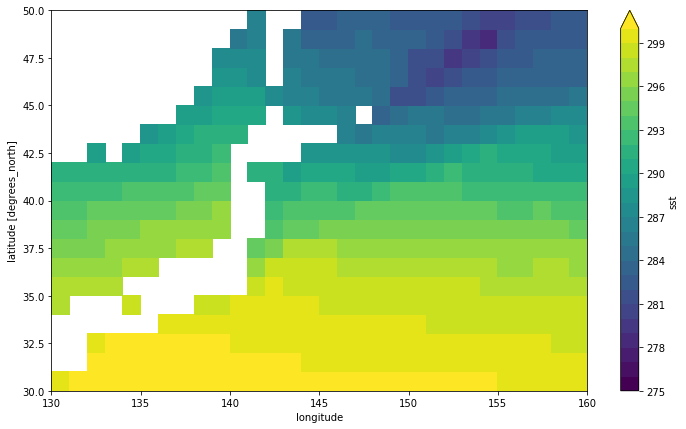

In [10]:
xrclustered_temp[1][0][np.where(xrclustered_temp[1][0]['time']['cluster'] == 2)].mean('time').plot(levels = levels)

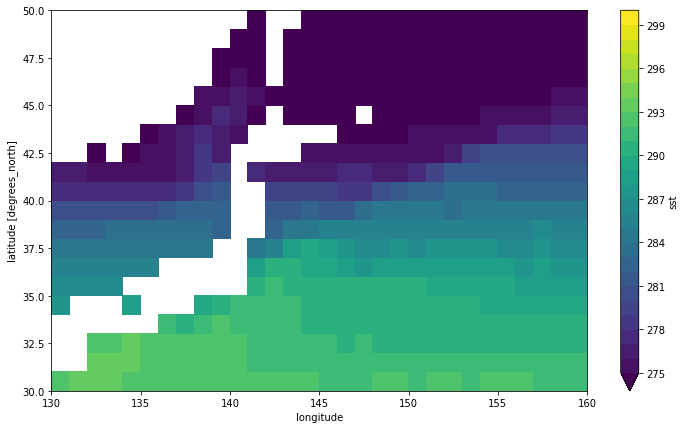

In [11]:
xrclustered_temp[1][0][np.where(xrclustered_temp[1][0]['time']['cluster'] == 3)].mean('time').plot(levels = levels)

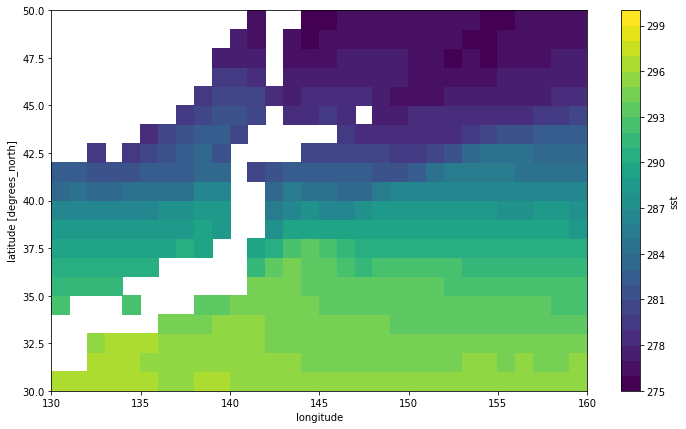

In [14]:
xrclustered_temp[0][1][np.where(xrclustered_temp[0][1]['time']['cluster'] == 1)].mean('time').plot(levels = levels)

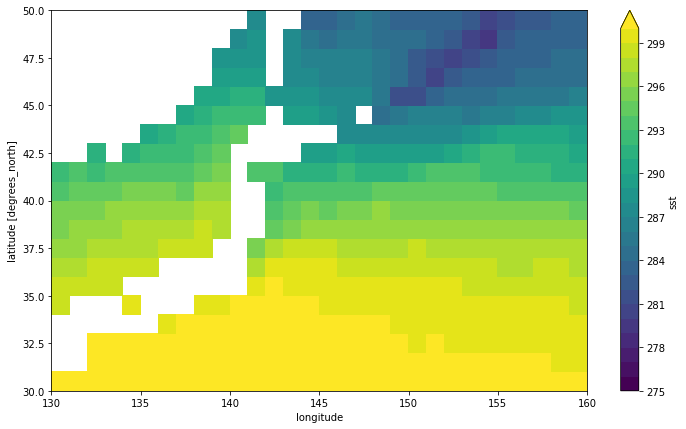

In [15]:
xrclustered_temp[0][1][np.where(xrclustered_temp[0][1]['time']['cluster'] == 2)].mean('time').plot(levels = levels)

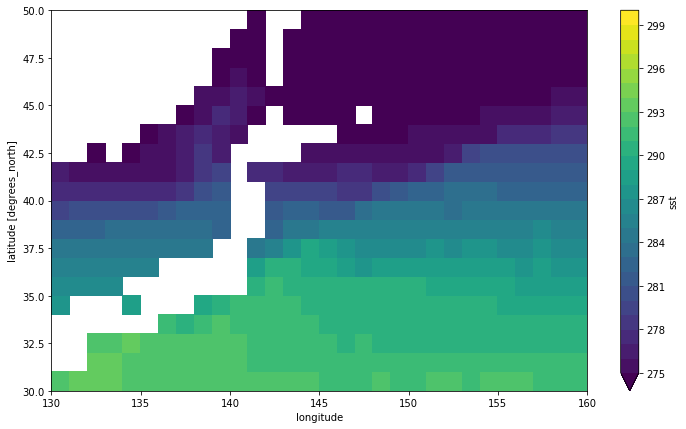

In [16]:
xrclustered_temp[0][1][np.where(xrclustered_temp[0][1]['time']['cluster'] == 3)].mean('time').plot(levels = levels)

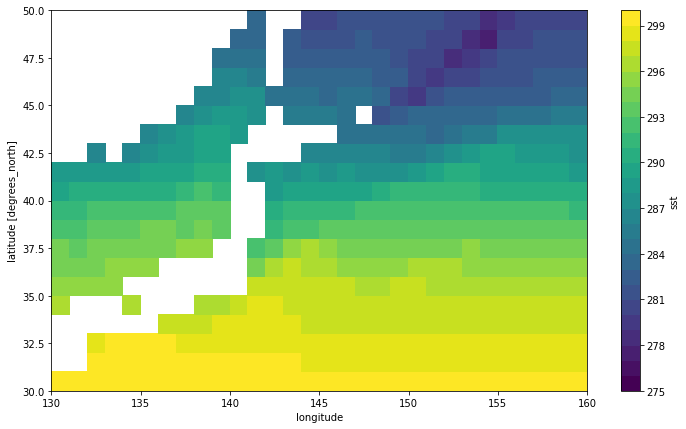

In [17]:
xrclustered_temp[0][1][np.where(xrclustered_temp[0][1]['time']['cluster'] == 4)].mean('time').plot(levels = levels)

In [18]:
ar = np.array([4, 5])

In [19]:
ar

array([4, 5])

In [26]:
if isinstance(ar, np.ndarray):
    print('yaaaas')

yaaaas
